# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [55]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

<AxesSubplot:ylabel='Count'>

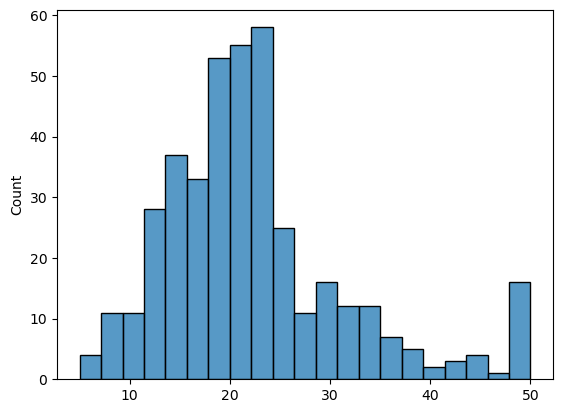

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape
sns.histplot(y_train)

In [3]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [4]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [5]:

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the X_train set
scaler.fit(X_train)

# Transform the X_train and X_test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [6]:
# Calculate the mean value of y on the train set
y_train_mean = np.mean(y_train)

# Create a dumb prediction array with the same shape as y_test, filled with the mean value of y on the train set
dumb_prediction = np.full(y_test.shape, y_train_mean)

# Calculate the mean absolute error between the dumb prediction and y_test
mae = mean_absolute_error(y_test, dumb_prediction)

print('Mean Absolute Error:', mae)

Mean Absolute Error: 6.533042127742185


# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [7]:
def initialize_model(input_dim):
    model = Sequential()
    model.add(Dense(10, input_dim=input_dim, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1))
    return model

input_dim = X_train.shape[1]
model = initialize_model(input_dim)

# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [8]:
def compile_model(model, optimizer_name):
    model.compile(loss='mean_absolute_error', optimizer=optimizer_name, metrics=['mean_absolute_error'])
    return model
  

optimizer = Adam()
compiled_model = compile_model(model, optimizer)
compiled_model.fit(X_train, y_train, epochs=100)
print(compiled_model.summary()) 

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 22.6382 - mean_absolute_error: 22.6382
Epoch 2/100
13/13 [==============================] - 0s 718us/step - loss: 22.4138 - mean_absolute_error: 22.4138
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 22.1940 - mean_absolute_error: 22.1940
Epoch 4/100
13/13 [==============================] - 0s 749us/step - loss: 21.9738 - mean_absolute_error: 21.9738
Epoch 5/100
13/13 [==============================] - 0s 995us/step - loss: 21.7463 - mean_absolute_error: 21.7463
Epoch 6/100
13/13 [==============================] - 0s 937us/step - loss: 21.5071 - mean_absolute_error: 21.5071
Epoch 7/100
13/13 [==============================] - 0s 998us/step - loss: 21.2603 - mean_absolute_error: 21.2603
Epoch 8/100
13/13 [==============================] - 0s 823us/step - loss: 20.9991 - mean_absolute_error: 20.9991
Epoch 9/100
13/13 [==============================] - 0s 924us/step - loss: 20.7083 - mean_ab

13/13 [==============================] - 0s 1ms/step - loss: 3.0444 - mean_absolute_error: 3.0444
Epoch 74/100
13/13 [==============================] - 0s 965us/step - loss: 3.0210 - mean_absolute_error: 3.0210
Epoch 75/100
13/13 [==============================] - 0s 1ms/step - loss: 3.0091 - mean_absolute_error: 3.0091
Epoch 76/100
13/13 [==============================] - 0s 913us/step - loss: 2.9902 - mean_absolute_error: 2.9902
Epoch 77/100
13/13 [==============================] - 0s 919us/step - loss: 2.9611 - mean_absolute_error: 2.9611
Epoch 78/100
13/13 [==============================] - 0s 752us/step - loss: 2.9444 - mean_absolute_error: 2.9444
Epoch 79/100
13/13 [==============================] - 0s 798us/step - loss: 2.9388 - mean_absolute_error: 2.9388
Epoch 80/100
13/13 [==============================] - 0s 794us/step - loss: 2.9096 - mean_absolute_error: 2.9096
Epoch 81/100
13/13 [==============================] - 0s 758us/step - loss: 2.8890 - mean_absolute_error: 2.8890


❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [9]:

# Initialize the model
input_dim = X_train.shape[1]
model = initialize_model(input_dim)

# Compile the model with the Adam optimizer
optimizer = Adam()
model = compile_model(model, optimizer)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model on the data
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])





Epoch 1/100
13/13 [==============================] - 0s 11ms/step - loss: 22.3000 - mean_absolute_error: 22.3000 - val_loss: 22.9141 - val_mean_absolute_error: 22.9141
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 22.0991 - mean_absolute_error: 22.0991 - val_loss: 22.7117 - val_mean_absolute_error: 22.7117
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 21.8926 - mean_absolute_error: 21.8926 - val_loss: 22.5002 - val_mean_absolute_error: 22.5002
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 21.6703 - mean_absolute_error: 21.6703 - val_loss: 22.2790 - val_mean_absolute_error: 22.2790
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 21.4391 - mean_absolute_error: 21.4391 - val_loss: 22.0379 - val_mean_absolute_error: 22.0379
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 21.1903 - mean_absolute_error: 21.1903 - val_loss: 21.7689 - val_mean_absolute_error: 21.76

13/13 [==============================] - 0s 3ms/step - loss: 3.4478 - mean_absolute_error: 3.4478 - val_loss: 4.3386 - val_mean_absolute_error: 4.3386
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 3.4060 - mean_absolute_error: 3.4060 - val_loss: 4.3029 - val_mean_absolute_error: 4.3029
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 3.3652 - mean_absolute_error: 3.3652 - val_loss: 4.2653 - val_mean_absolute_error: 4.2653
Epoch 53/100
13/13 [==============================] - 0s 2ms/step - loss: 3.3297 - mean_absolute_error: 3.3297 - val_loss: 4.2304 - val_mean_absolute_error: 4.2304
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 3.2982 - mean_absolute_error: 3.2982 - val_loss: 4.2129 - val_mean_absolute_error: 4.2129
Epoch 55/100
13/13 [==============================] - 0s 2ms/step - loss: 3.2596 - mean_absolute_error: 3.2596 - val_loss: 4.1726 - val_mean_absolute_error: 4.1726
Epoch 56/100
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 2.3866 - mean_absolute_error: 2.3866 - val_loss: 3.0672 - val_mean_absolute_error: 3.0672


❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [44]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loss
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Loss')
    ax1.set_xlabel('epochs')
    ax1.grid(axis="y",linewidth=0.5)

    # MAE
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_xlabel('epochs')
    ax2.grid(axis="y",linewidth=0.5)
    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 1ms/step - loss: 23.8242 - mae: 3.1486
MAE with the rmsprop optimizer: 3.1486  reached in 8 s after 208 epochs


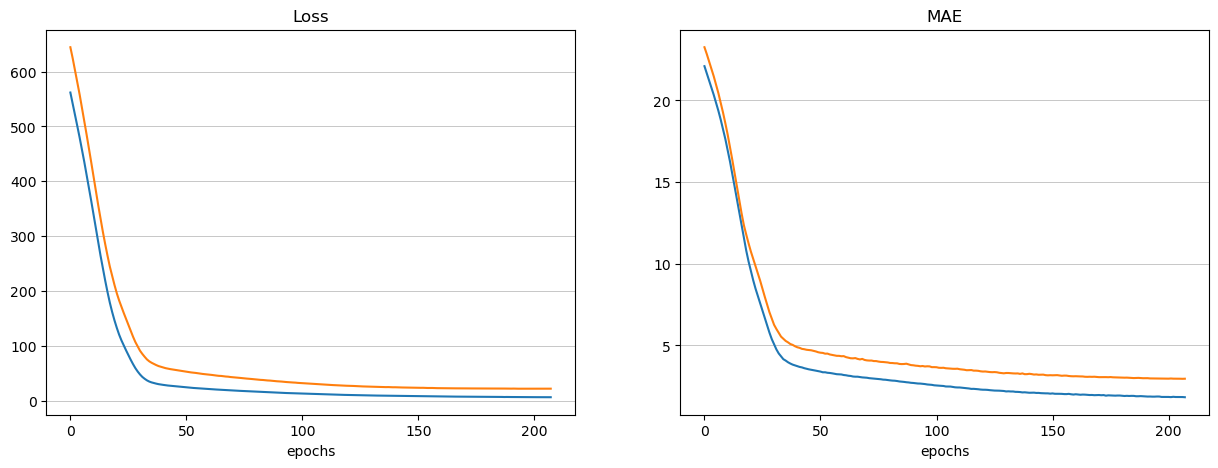

4/4 [==============================] - 0s 1ms/step - loss: 23.7416 - mae: 2.8426
MAE with the adam optimizer: 2.8426  reached in 15 s after 408 epochs


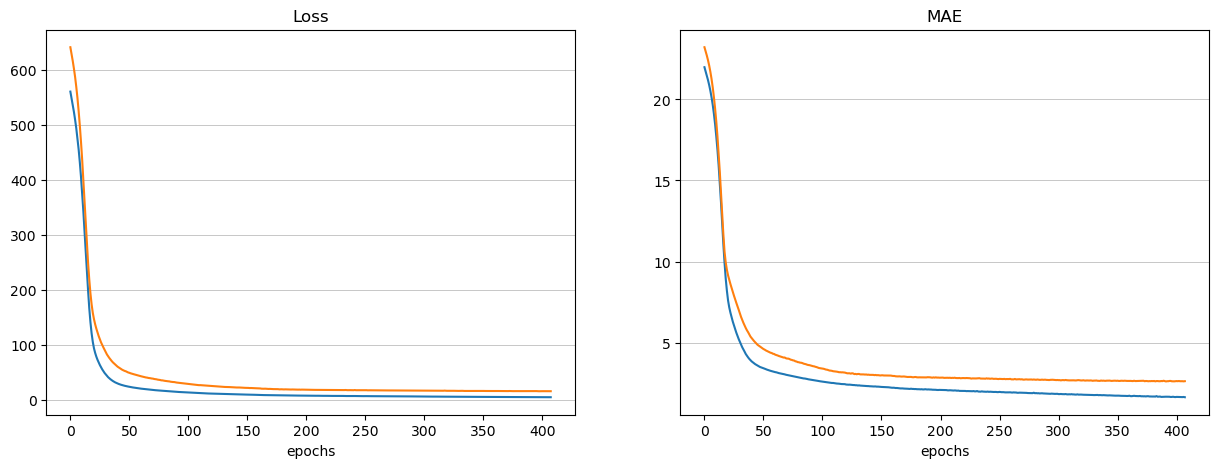

4/4 [==============================] - 0s 1ms/step - loss: 351.0975 - mae: 17.2231
MAE with the adagrad optimizer: 17.2231  reached in 17 s after 500 epochs


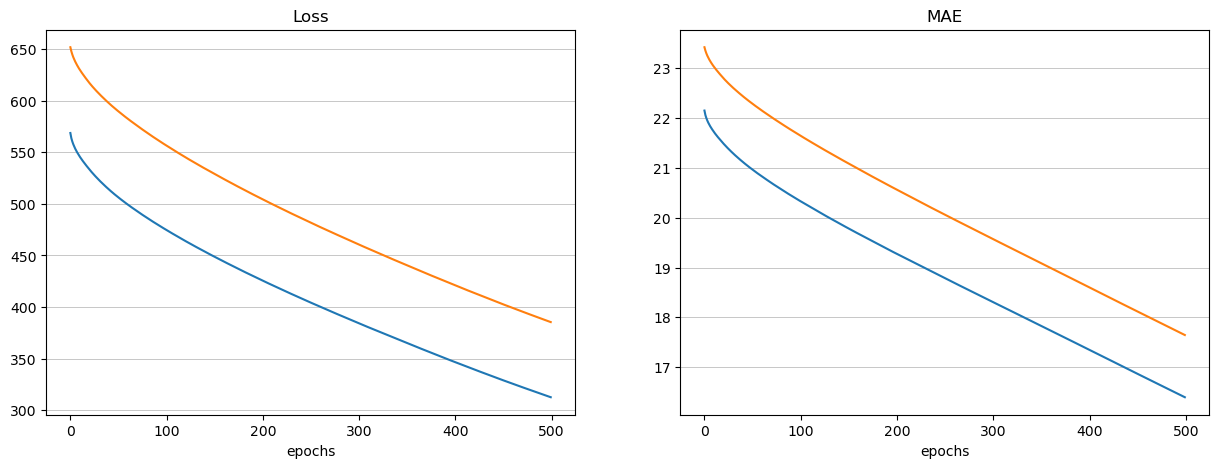

In [45]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model(input_dim)
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

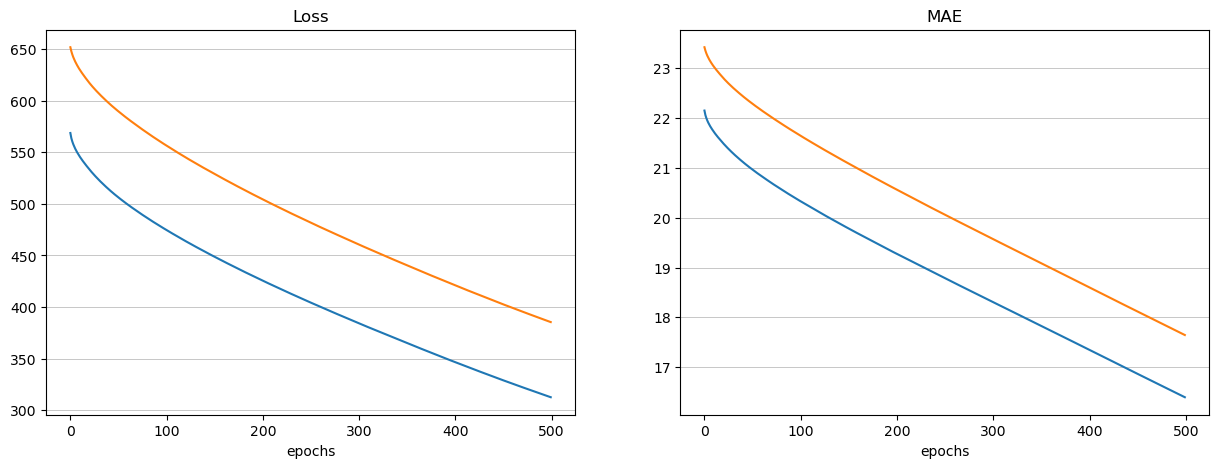

In [46]:
# YOUR CODE HERE
def compile_model(model, optimizer_name):
    model.compile(loss='mse', optimizer=optimizer_name, metrics= ['mae']) 
    return model

optimizer = Adam(learning_rate=0.1)
compile_model(model, optimizer)



plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

4/4 [==============================] - 0s 1ms/step - loss: 24.2782 - mae: 2.9653
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000015ACEDB2370> optimizer and lr=0.01 : 2.9653  reached in 245 s after 99 epochs


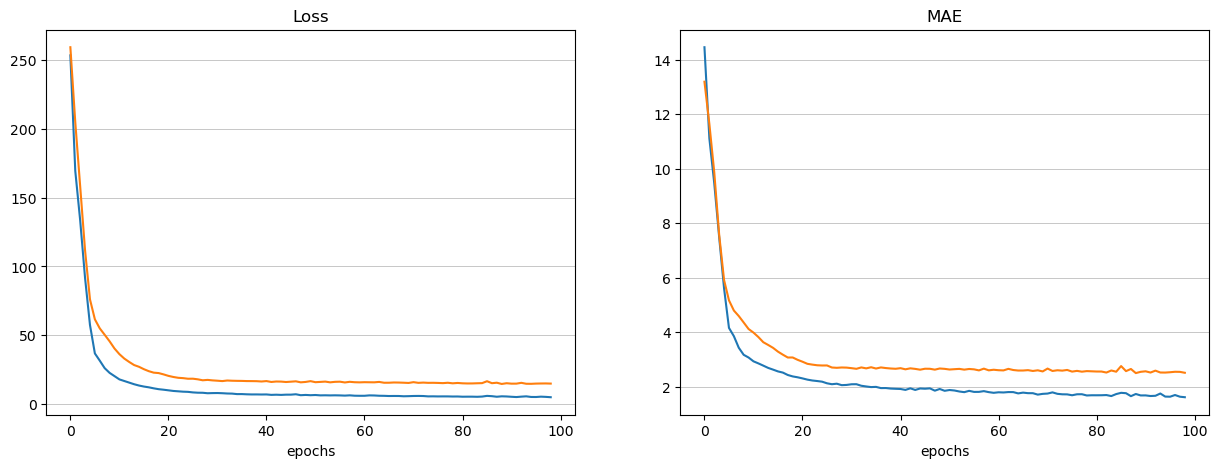

4/4 [==============================] - 0s 1ms/step - loss: 17.7823 - mae: 2.9752
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000015ACED66220> optimizer and lr=0.05 : 2.9752  reached in 247 s after 64 epochs


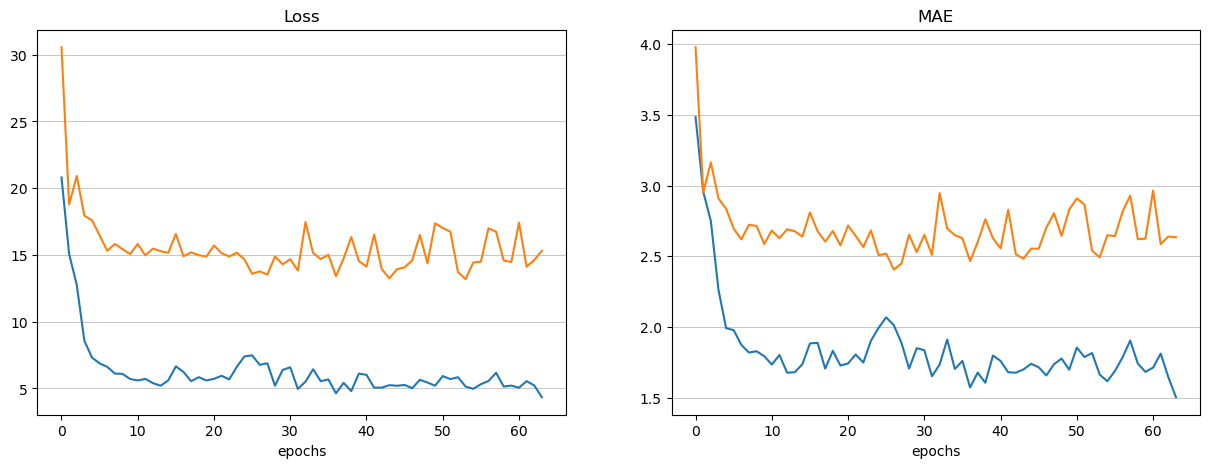

4/4 [==============================] - 0s 1ms/step - loss: 19.4710 - mae: 2.9528
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000015AD023BD60> optimizer and lr=0.1 : 2.9528  reached in 249 s after 27 epochs


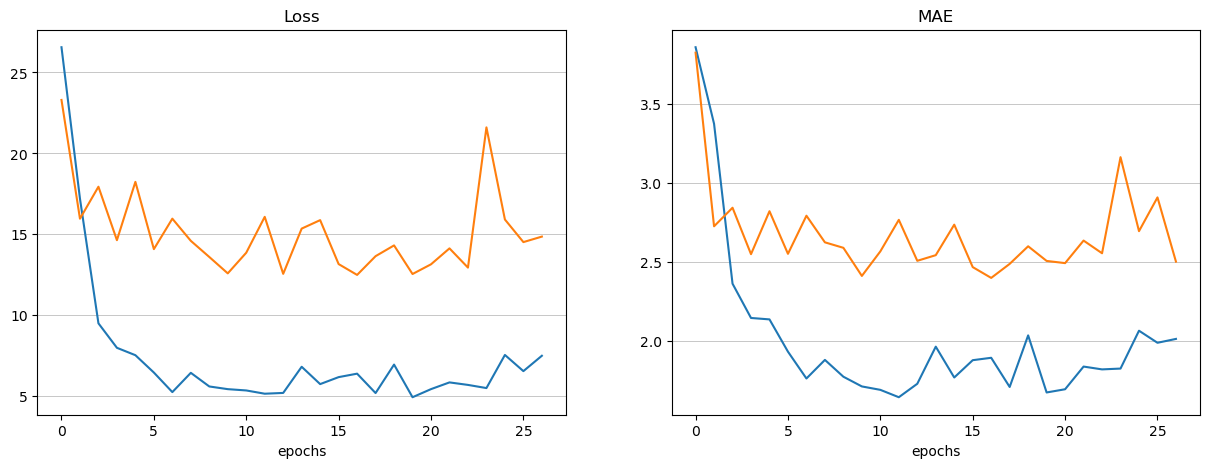

4/4 [==============================] - 0s 1ms/step - loss: 15.0981 - mae: 2.6561
MAE with the <keras.optimizers.optimizer_experimental.adam.Adam object at 0x0000015ACD7D9340> optimizer and lr=0.2 : 2.6561  reached in 251 s after 62 epochs


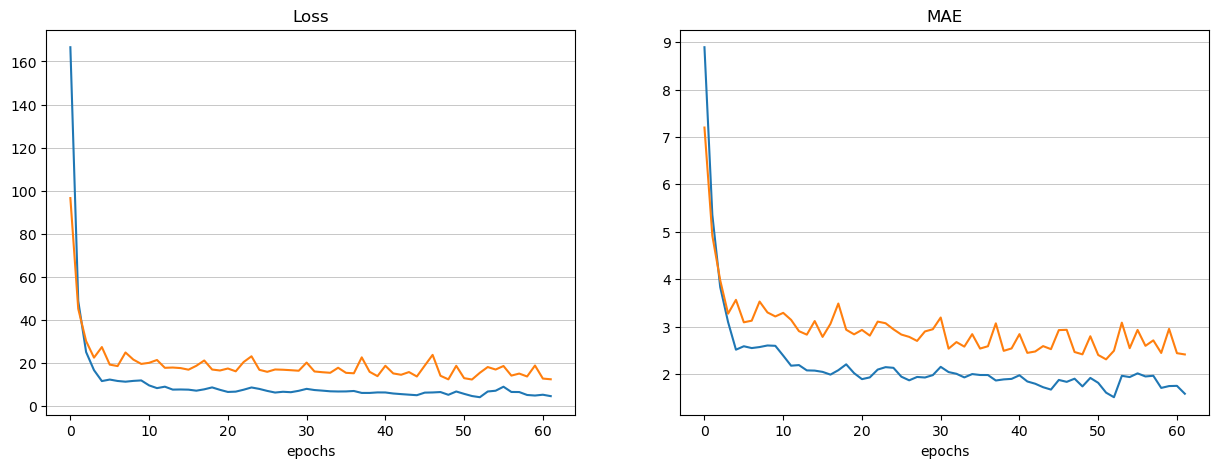

In [47]:
learning_rates = [0.01, 0.05, 0.1, 0.2]

for lr in learning_rates:
    optimizer = Adam(learning_rate=lr)
    compiled_model = compile_model(model, optimizer)
    history = compiled_model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[early_stopping], verbose=0)

    res = compiled_model.evaluate(X_test, y_test)[1]
    end_time = time.time()
    print(f'MAE with the {optimizer} optimizer and lr={lr} : {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

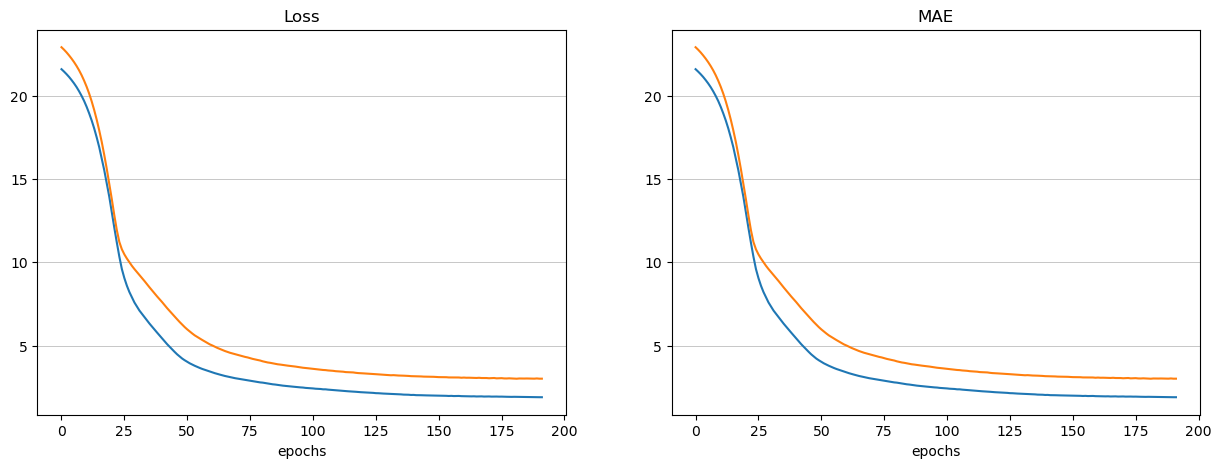

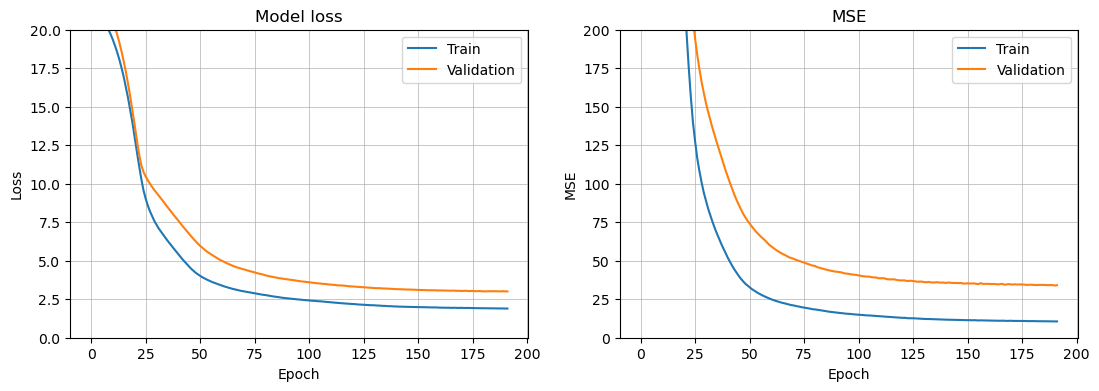

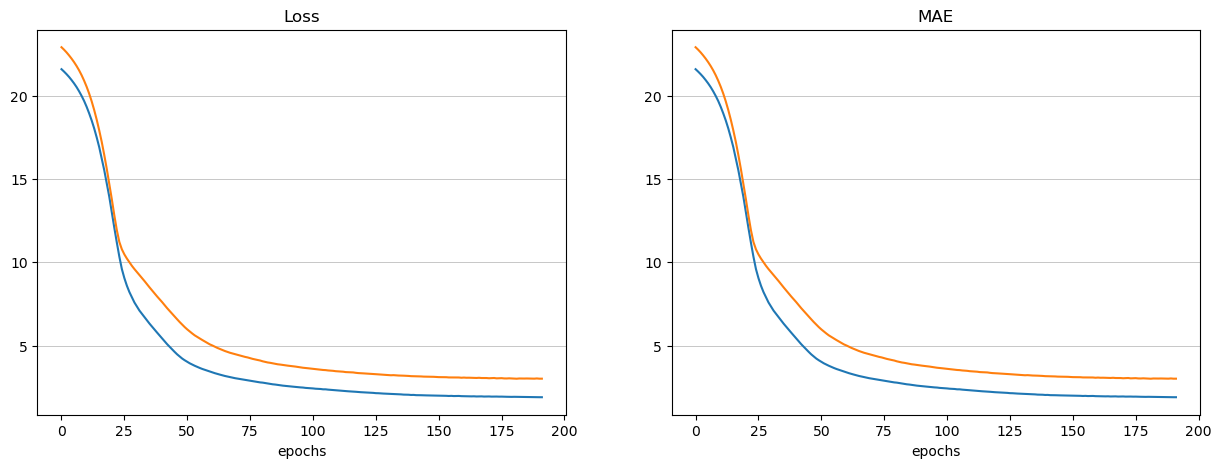

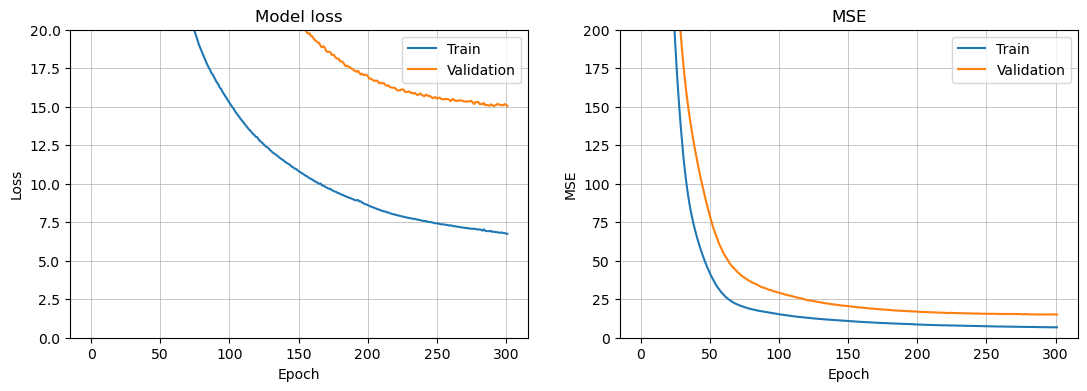

In [48]:

# YOUR CODE HERE
# Training the model with mae as the loss function
model_mae = initialize_model(input_dim)
model_mae.compile(loss='mae', optimizer=Adam(), metrics=['mae', 'mse'])
history_mae = model_mae.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[early_stopping], verbose=0)

# Plot the loss and MAE values for the model trained with mae as loss function
plot_loss_mae(history_mae)
plot_loss_mse(history_mae)

# Training the model with mse as the loss function
model_mse = initialize_model(input_dim)
model_mse.compile(loss='mse', optimizer=Adam(), metrics=['mae', 'mse'])
history_mse = model_mse.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[early_stopping], verbose=0)

# Plot the loss and MAE values for the model trained with mse as loss function
plot_loss_mae(history_mae)
plot_loss_mse(history_mse)

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [56]:
# Training the model with mae as the loss function
model_mae = initialize_model(input_dim)
model_mae.compile(loss='mae', optimizer=Adam(), metrics=['mae', 'mse'])
history_mae = model_mae.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[early_stopping], verbose=0)

# Evaluate the model on the test set
mae_test = model_mae.evaluate(X_test, y_test, verbose=0)[1]

# Save the model
model_mae.save("best_model.h5")

# Load the saved model
loaded_model = keras.models.load_model("best_model.h5")

# Make predictions on the test set using the loaded model
test_predictions = loaded_model.predict(X_test)

# Compare the predictions with the true values
mae_test = np.mean(np.abs(test_predictions - y_test))

# Print the mae_test
print("The mean absolute error on the test set is:", mae_test)


4/4 [==============================] - 0s 1ms/step
The mean absolute error on the test set is: 9.4843020400649


# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [ ]:
# YOUR CODE

## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [ ]:
# YOUR CODE HERE